In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
iris_data = pd.read_csv('IRIS (1).csv')

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
sns.set()

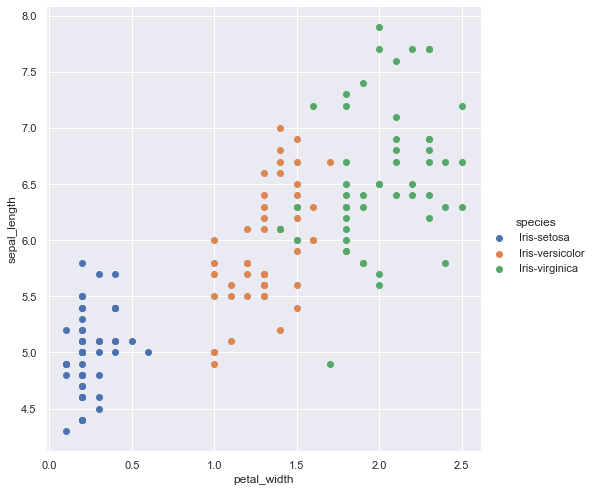

In [10]:
sns.FacetGrid(iris_data, hue = 'species', height = 7).map(plt.scatter,'petal_width','sepal_length').add_legend()

In [11]:
iris_data.replace({'species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

In [12]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
X = iris_data.drop(columns = ['species'],axis=1)
y = iris_data['species']

In [14]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (120, 4)
Shape of y_train =  (120,)
Shape of X_test =  (30, 4)
Shape of y_test =  (30,)


In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
X_train_pred = model.predict(X_train)

In [20]:
X_train_pred

array([0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 1], dtype=int64)

In [21]:
trained_data_accuracy = accuracy_score(y_train,X_train_pred)

In [22]:
print('Accuracy of trained data = ', trained_data_accuracy )

Accuracy of trained data =  0.9833333333333333


In [23]:
X_test_pred = model.predict(X_test)

In [24]:
X_test_pred

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

In [25]:
tested_data_acuuracy = accuracy_score(y_test,X_test_pred)

In [26]:
print('Accuracy of tested data = ', trained_data_accuracy )

Accuracy of tested data =  0.9833333333333333
